In [ ]:
!pip install --upgrade pip
!pip install tensorflow
!pip install numpy pandas matplotlib

Requirement already up-to-date: pip in /opt/venv/lib/python3.7/site-packages (20.0.2)


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2, l1, l1_l2
import matplotlib.pyplot as plt


In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [ ]:
def NaiveModel(vocab_size):  # 70% accuracy
    model = Sequential([
        Embedding(vocab_size, 64),
        Bidirectional(GRU(64, return_sequences=True)),
        Bidirectional(GRU(64, return_sequences=True)),
        Bidirectional(GRU(64, return_sequences=True)),
        Bidirectional(GRU(64, return_sequences=True)),
        Bidirectional(GRU(64)),
        Dense(128, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    return model




In [ ]:
def NaiveIteration(vocab_size): #73% accuracy
    model = Sequential([
        Embedding(vocab_size, 64),
        Bidirectional(GRU(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
        Bidirectional(GRU(64,return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
        BatchNormalization(),
        Dense(64, activation='relu',kernel_regularizer=l1_l2()),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model


Test 1
GRU ->
Linear -> 
Sigmoid


In [ ]:
#to plot loss over time 



In [ ]:
tweets = list()
targets = list()

with open('../preprocessing_scripts/new_train_data.txt', 'r') as f:
  tweets = f.readlines()
print(len(tweets))

with open('../preprocessing_scripts/targets.csv', 'r') as f:
  targets = f.readlines()
targets2 = list()
for i in range(0, len(targets)): 
    targets2.append(int(targets[i]))
targets = targets2

7613


In [ ]:


max_words = 14000
tokenizer = Tokenizer(num_words=max_words)


In [ ]:
trainX = tweets[:6000]
trainY = targets[:6000]

testX = tweets[6000:]
testY = tweets[6000:]

maxlen = 100



tokenizer.fit_on_texts(trainX)
tokenized_version = tokenizer.texts_to_sequences(trainX)
tokenized_version = pad_sequences(tokenized_version, maxlen=maxlen)
print(tokenized_version)

[[   0    0    0 ...  165   58    1]
 [   0    0    0 ...   84   15    1]
 [   0    0    0 ...   33 1064    1]
 ...
 [   0    0    0 ...   10 2164    1]
 [   0    0    0 ...    8  682    1]
 [   0    0    0 ...  866 3316    1]]


In [ ]:
vocab_size = 14000
#model = models.NaiveModel(vocab_size)
model = NaiveIteration(vocab_size)
es = EarlyStopping(patience=5)
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss')
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy']) 

In [ ]:
trainY = np.array(trainY)
history = model.fit(x=tokenized_version, y=trainY, batch_size = 32, epochs=10, validation_split = 0.2,callbacks=[es,mcp_save])

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 96s 20ms/sample - loss: 4.2160 - accuracy: 0.5463 - val_loss: 1.2552 - val_accuracy: 0.5742
Epoch 2/10
4800/4800 [==============================] - 82s 17ms/sample - loss: 0.7829 - accuracy: 0.5817 - val_loss: 0.7005 - val_accuracy: 0.5742
Epoch 3/10
4800/4800 [==============================] - 82s 17ms/sample - loss: 0.6982 - accuracy: 0.5821 - val_loss: 0.7033 - val_accuracy: 0.5742
Epoch 4/10
4800/4800 [==============================] - 84s 17ms/sample - loss: 0.6941 - accuracy: 0.5821 - val_loss: 0.6954 - val_accuracy: 0.5742
Epoch 5/10
4800/4800 [==============================] - 91s 19ms/sample - loss: 0.6512 - accuracy: 0.5821 - val_loss: 0.6992 - val_accuracy: 0.5742
Epoch 6/10
4800/4800 [==============================] - 81s 17ms/sample - loss: 0.5986 - accuracy: 0.7496 - val_loss: 0.7593 - val_accuracy: 0.6866
Epoch 7/10
4800/4800 [==============================] - 83s 17ms

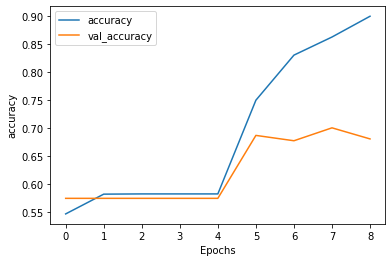

In [ ]:
plot_graphs(history,"accuracy")

